In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
nobel_df = pd.read_csv('nobel.csv')

# inspecting the first five rows
print(f"Inspecting first five rows :\n {nobel_df.head()}")

# checking data types 
print(f"Printing out data types:\n{nobel_df.dtypes}")

# -- 1. Data Cleaning:  converting [birth_date and death_date] to date objects
nobel_df['birth_date'] = pd.to_datetime(nobel_df['birth_date'],errors='coerce')
nobel_df['death_date'] = pd.to_datetime(nobel_df['death_date'],errors='coerce')

# checking data types to verify update 
print(f"Printing out data types, birth_day :\n{nobel_df['birth_date'].dtypes}\n, death_day :\n{nobel_df['death_date'].dtypes}")

print(nobel_df.isnull().sum())
 


            


Inspecting first five rows :
    year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_dat

In [20]:
 # -- 2. Data Cleaning: Identifying columns to drop 
threshold = len(nobel_df) * 0.05
print(f"threshold: {threshold}")

# filtering out columns within the threshold
cols_to_drop = nobel_df.columns[(nobel_df.isnull().sum() != 0) & (nobel_df.isnull().sum() <= threshold)]
print(f"dropping columns: {cols_to_drop}")

# # dropping columns 
nobel_df.dropna(subset=cols_to_drop, inplace=True)

threshold: 50.0
dropping columns: Index(['birth_date', 'birth_city', 'birth_country', 'sex'], dtype='object')


In [21]:
# verifying update 
print(nobel_df.isnull().sum())


year                      0
category                  0
prize                     0
motivation               72
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                0
birth_city                0
birth_country             0
sex                       0
organization_name       229
organization_city       230
organization_country    230
death_date              357
death_city              374
death_country           368
dtype: int64


In [22]:
# 3. -- Data Cleaning: Identifying columns to impute 
cols_to_impute = nobel_df.columns[(nobel_df.isnull().sum() > 0)]
print(f"imputing columns: {cols_to_impute}")

imputing columns: Index(['motivation', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [23]:

# function for imputation 
def impute_columns(df, cols_to_impute):
    for col in cols_to_impute:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

cols_to_impute = nobel_df.columns[(nobel_df.isnull().sum() > 0)]
nobel_df = impute_columns(nobel_df, cols_to_impute)



In [24]:
# verifying imputation 
print(nobel_df.isnull().sum())

year                      0
category                  0
prize                     0
motivation                0
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                0
birth_city                0
birth_country             0
sex                       0
organization_name         0
organization_city         0
organization_country      0
death_date              357
death_city                0
death_country             0
dtype: int64


In [25]:
# verifying if data cleaning steps were completed successfully 
missing_values_after_cleaning = nobel_df.isnull().sum()

if missing_values_after_cleaning.sum() == 0:
    print(f" Data cleaning was successful, no missing values were found")
else:
    print(f" Data cleaning incomplete!, missing values were found at:\n {missing_values_after_cleaning[missing_values_after_cleaning > 0]}")

 Data cleaning incomplete!, missing values were found at:
 death_date    357
dtype: int64


In [32]:
# introducing two new columns: age_awarded and age_at_death

# 1.  age_awarded
nobel_df['age_awarded'] = nobel_df['year'] - nobel_df['birth_date'].dt.year

print(f"Verifying update:\n {nobel_df[['full_name','age_awarded']].head()}")


# 2. Creating the 'age_at_death' column: calculates age for deceased individuals and sets True for living ones.
# Numeric ages are converted to integers, ensuring consistency in the column.


nobel_df['age_at_death'] = np.where(nobel_df['death_date'].isnull(), True, nobel_df['death_date'].dt.year - nobel_df['birth_date'].dt.year).astype(float)

print(f"Verifying update:\n {nobel_df[['full_name','age_at_death']].head()}")


# casting 'age_at_death' as an integer 

nobel_df['age_at_death'] = nobel_df['age_at_death'].apply(lambda x: int(x) if pd.notnull(x) and isinstance(x, float) else x)

print(f"Verifying update of column:\n {nobel_df[['full_name','age_at_death']].head()}")

Verifying update:
                       full_name  age_awarded
0  Jacobus Henricus van 't Hoff           49
1               Sully Prudhomme           62
2        Emil Adolf von Behring           47
3             Jean Henry Dunant           73
4                Frédéric Passy           79
Verifying update:
                       full_name  age_at_death
0  Jacobus Henricus van 't Hoff          59.0
1               Sully Prudhomme          68.0
2        Emil Adolf von Behring          63.0
3             Jean Henry Dunant          82.0
4                Frédéric Passy          90.0
Verifying update of column:
                       full_name  age_at_death
0  Jacobus Henricus van 't Hoff            59
1               Sully Prudhomme            68
2        Emil Adolf von Behring            63
3             Jean Henry Dunant            82
4                Frédéric Passy            90


Min: 1901, Max: 2023
Printing out awards distribution:
 year
1901     6
1902     7
1903     7
1904     5
1905     5
        ..
2019    13
2020    10
2021     9
2022    11
2023     7
Name: category, Length: 120, dtype: int64
Year(s) with more winners:
 year
1996    13
2000    13
2001    13
2002    13
2014    13
2019    13
Name: category, dtype: int64 with 13
Year(s) with less winners:
 year
1916    1
Name: category, dtype: int64 with 1


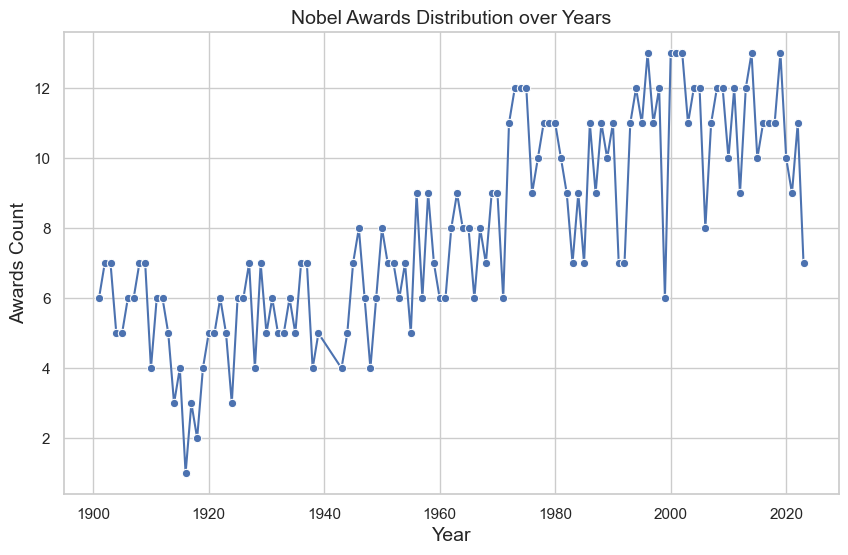

   year  decade decade_name
0  1901    1900       1900s
1  1901    1900       1900s
2  1901    1900       1900s
3  1901    1900       1900s
4  1901    1900       1900s
5  1901    1900       1900s
6  1902    1900       1900s
7  1902    1900       1900s
8  1902    1900       1900s
9  1902    1900       1900s
Printing out awards by decade:
 decade_name
1900s     56
1910s     38
1920s     54
1930s     55
1940s     40
1950s     71
1960s     75
1970s    103
1980s     94
1990s    101
2000s    117
2010s    112
2020s     37
Name: category, dtype: int64
Decade with most awards:
2000s with 117 awards
Decade with least awards:
2020s with 37 awards


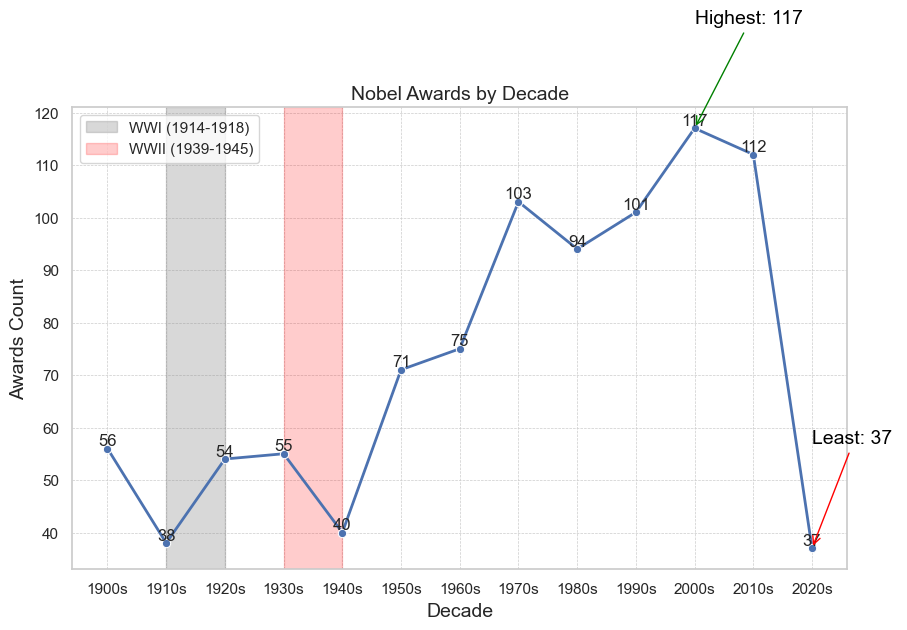

In [133]:
# -- Exploratory Data Analysis ---

# 1. Awards distribution over time 
min_year = nobel_df['year'].min()
max_year = nobel_df['year'].max()
print(f"Min: {min_year}, Max: {max_year}")



# 2. Year with the most awards
awards_distribution = nobel_df.groupby('year')['category'].count()
print(f"Printing out awards distribution:\n {awards_distribution}")

most_wins = awards_distribution.max()
most_wins_year = awards_distribution[awards_distribution == most_wins]
print(f"Year(s) with more winners:\n {most_wins_year} with {most_wins}")

less_wins = awards_distribution.min()
less_wins_year = awards_distribution[awards_distribution == less_wins]
print(f"Year(s) with less winners:\n {less_wins_year} with {less_wins}")



# 3. visualizing award distributions over years
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=awards_distribution.index, y=awards_distribution.values,marker='o')
plt.title("Nobel Awards Distribution over Years", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Awards Count", fontsize=14)
plt.show()




nobel_df['decade'] = (nobel_df['year'] // 10) * 10
nobel_df['decade_name'] = nobel_df['decade'].astype(str) + 's'
print(nobel_df[['year','decade','decade_name']].head(10))

awards_by_decade = nobel_df.groupby('decade_name')['category'].count()
print(f"Printing out awards by decade:\n {awards_by_decade}")

# decade with the most and least awards 
most_awards = awards_by_decade.max()
least_awards = awards_by_decade.min()

decade_with_most_awards = awards_by_decade.idxmax()
print(f"Decade with most awards:\n{decade_with_most_awards} with {most_awards} awards")

decade_with_least_awards = awards_by_decade.idxmin()
print(f"Decade with least awards:\n{decade_with_least_awards} with {least_awards} awards")


# 4. Visualizing award trends over decades
plt.figure(figsize=(10, 6))
sns.lineplot(x=awards_by_decade.index, y=awards_by_decade.values,marker='o', linewidth=2)

# # Highlight WWI (1914-1918)
plt.axvspan('1910s','1920s', color='gray', alpha=0.3, label='WWI (1914-1918)')
 
# Highlight WWII (1939-1945)
plt.axvspan('1930s','1940s', color='red', alpha=0.2, label='WWII (1939-1945)')

for x,y in zip(awards_by_decade.index, awards_by_decade.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom',fontsize=12)
plt.title("Nobel Awards by Decade", fontsize=14)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Awards Count", fontsize=14)
plt.grid(True, linestyle='--',linewidth=0.5)


#annotate the decade with the highest number of awards
plt.annotate(
    f"Highest: {most_awards} ",
    xy=(decade_with_most_awards, most_awards),
    xytext=(decade_with_most_awards, most_awards + 20),
    arrowprops=dict(arrowstyle="->",color='green'),
    fontsize=14,
    color='black'
)

#annotate the decade with the least number of awards
plt.annotate(
    f"Least: {least_awards} ",
    xy=(decade_with_least_awards, least_awards),
    xytext=(decade_with_least_awards, least_awards + 20),
    arrowprops=dict(arrowstyle="->",color='red'),
    fontsize=14,
    color='black'
)

plt.legend(loc='upper left')
plt.show()






Printing out categories distribution:
 category
Medicine      225
Physics       224
Chemistry     188
Literature    118
Peace         108
Economics      90
Name: count, dtype: int64


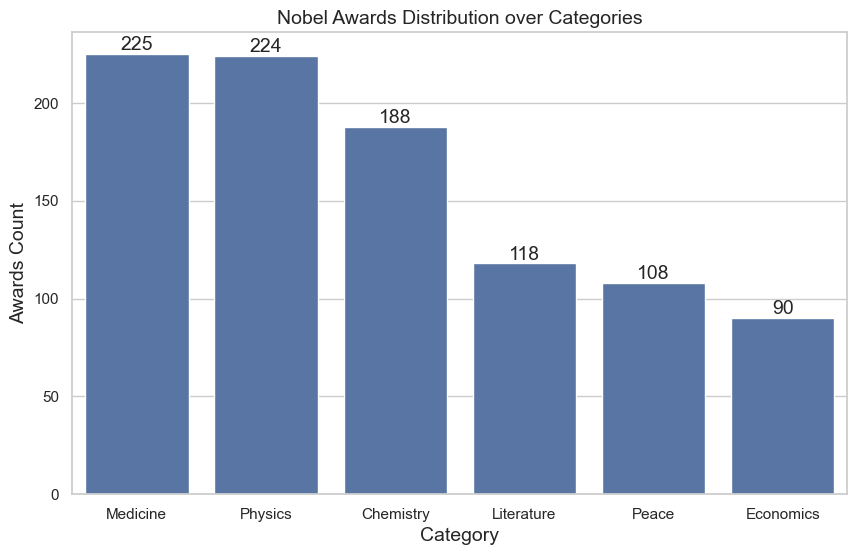

In [99]:
# Nobel Prize Categories:
# 1. Trends by categories

categories_distribution = nobel_df['category'].value_counts()
print(f"Printing out categories distribution:\n {categories_distribution}")

plt.figure(figsize=(10, 6))
sns.barplot(x=categories_distribution.index, y=categories_distribution.values)
plt.title("Nobel Awards Distribution over Categories", fontsize=14)
for x,y in zip(categories_distribution.index, categories_distribution.values):
    plt.text(x,y,f'{y}' , ha='center', va='bottom', fontsize=14)

plt.xlabel("Category", fontsize=14)
plt.ylabel("Awards Count", fontsize=14)
plt.show()

